In [2]:
#선언
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

In [3]:
#데이터셋 불러오기
train_df = pd.read_csv('C:/Users/w7e7r/Desktop/스파르타/심화프로젝트/train.csv')
train_df.head()
train_df.tail()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
96289,TRAIN_96289,14400000,36 months,10+ years,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C
96290,TRAIN_96290,28800000,60 months,10+ years,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E
96291,TRAIN_96291,14400000,36 months,1 year,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A
96292,TRAIN_96292,15600000,36 months,5 years,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D
96293,TRAIN_96293,8640000,36 months,10+ years,RENT,50400000,11.80,14,신용 카드,0,596148,274956.0,0.0,0.0,C


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


- 대출 등급에 영향을 미치는 변수
  - 대출기간이 짧을수록 대출 등급(B이상)이 높을 것이다
  - 전세가 대출 등급(B이상)이 높을 것이다
  - 목적이 주택 관련(주택개선, 이사, 주택)이라면 등급이 C이하일 것이다.
  -근로기간 관련해서 가설 세우고 싶은데 흠,,

# 필요?

1. 이상치 확인하기
2. 값 합치기
3. unknown 확인하기

## 이상치

<Axes: ylabel='대출금액'>

C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\w7e7r\AppData\Roa

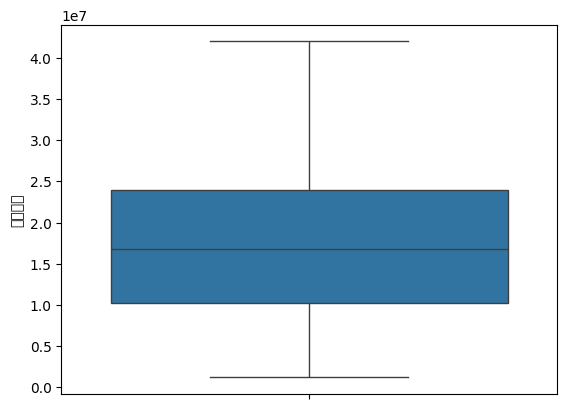

In [5]:
import seaborn as sns
sns.boxplot(train_df['대출금액'])

In [6]:
import numpy as np
mean = np.mean(train_df['대출금액'])
std = np.std(train_df['대출금액'])
upper_limit = mean + 3*std
lower_limit = mean - 3*std
print(upper_limit, lower_limit)

49291064.00156264 -12683067.86473168


<Axes: ylabel='연간소득'>

C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 46301 (\N{HANGUL SYLLABLE DEUG}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\w7e7r\AppData\Ro

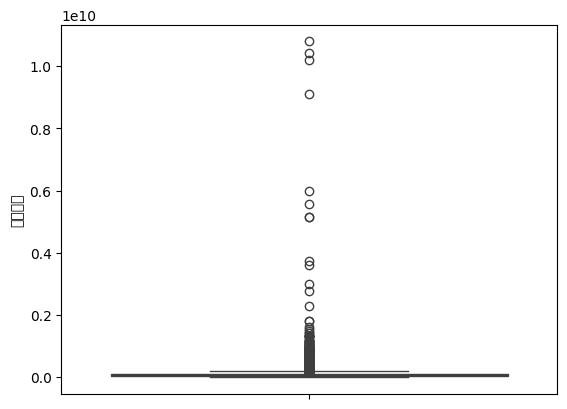

In [7]:
sns.boxplot(train_df['연간소득'])

In [8]:
import numpy as np
mean = np.mean(train_df['연간소득'])
std = np.std(train_df['연간소득'])
upper_limit = mean + 3*std
lower_limit = mean - 3*std
print(upper_limit, lower_limit)

392631298.19317746 -204777848.837579


In [9]:
cond = (train_df['연간소득'] > 392631298)
cond

0        False
1        False
2        False
3        False
4        False
         ...  
96289    False
96290    False
96291    False
96292    False
96293    False
Name: 연간소득, Length: 96294, dtype: bool

In [10]:
train_df[cond]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
114,TRAIN_00114,33600000,36 months,5 years,MORTGAGE,420000000,2.53,26,신용 카드,0,1666020,421656.0,0.0,0.0,A
608,TRAIN_00608,24000000,36 months,4 years,MORTGAGE,420000000,7.13,29,부채 통합,0,1235448,252624.0,0.0,0.0,A
642,TRAIN_00642,9000000,36 months,4 years,MORTGAGE,480000000,5.97,33,신용 카드,0,0,0.0,0.0,0.0,B
726,TRAIN_00726,42000000,36 months,2 years,RENT,420000000,18.15,49,신용 카드,0,1856340,1007856.0,0.0,0.0,D
1364,TRAIN_01364,28800000,36 months,2 years,RENT,408000000,11.01,26,신용 카드,1,2863368,743076.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95156,TRAIN_95156,42000000,36 months,10+ years,MORTGAGE,432000000,16.31,75,부채 통합,0,1921176,860280.0,0.0,0.0,C
95731,TRAIN_95731,42000000,60 months,2 years,OWN,720000000,6.29,40,부채 통합,0,480960,439224.0,0.0,0.0,C
95752,TRAIN_95752,42000000,60 months,6 years,MORTGAGE,420000000,9.84,27,신용 카드,0,1577376,1141788.0,0.0,0.0,B
95888,TRAIN_95888,24000000,36 months,3 years,OWN,420000000,3.65,14,부채 통합,0,1681104,654756.0,0.0,0.0,C


In [11]:
q1 = train_df['연간소득'].quantile(0.25)
q3 = train_df['연간소득'].quantile(0.75)
iqr = q3 - q1 
upper_limit2 = q3 + 1.5*iqr
lower_limit2 = q1 - 1.5*iqr
print(q1,q3,iqr, upper_limit2, lower_limit2)

57600000.0 112800000.0 55200000.0 195600000.0 -25200000.0


In [12]:
cond2 = (train_df['연간소득'] > upper_limit2)
train_df[cond2]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
34,TRAIN_00034,14550000,36 months,4 years,OWN,222000000,2.13,31,부채 통합,6,655620,320448.0,0.0,0.0,C
50,TRAIN_00050,14400000,36 months,< 1 year,MORTGAGE,198000000,10.51,46,신용 카드,1,369816,53196.0,0.0,0.0,A
78,TRAIN_00078,33600000,36 months,10+ years,MORTGAGE,259200000,4.12,38,부채 통합,0,1706676,327540.0,0.0,0.0,A
114,TRAIN_00114,33600000,36 months,5 years,MORTGAGE,420000000,2.53,26,신용 카드,0,1666020,421656.0,0.0,0.0,A
132,TRAIN_00132,12000000,36 months,2 years,RENT,384000000,6.94,41,신용 카드,1,0,0.0,0.0,0.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96263,TRAIN_96263,39450000,36 months,10+ years,MORTGAGE,210000000,26.30,39,주택 개선,0,1748928,951384.0,0.0,0.0,D
96268,TRAIN_96268,9000000,36 months,2 years,MORTGAGE,231000000,5.31,15,신용 카드,0,659448,192144.0,0.0,0.0,B
96273,TRAIN_96273,33600000,36 months,2 years,MORTGAGE,222000000,17.43,49,신용 카드,0,1706676,333360.0,0.0,0.0,A
96286,TRAIN_96286,42000000,60 months,2 years,MORTGAGE,244800000,18.80,51,부채 통합,0,1902036,2075832.0,0.0,0.0,D


<Axes: ylabel='부채_대비_소득_비율'>

C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-p

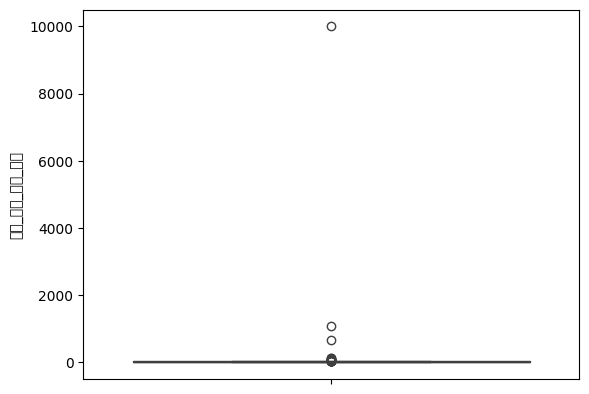

In [13]:
sns.boxplot(train_df['부채_대비_소득_비율'])

In [14]:

import numpy as np
mean = np.mean(train_df['부채_대비_소득_비율'])
std = np.std(train_df['부채_대비_소득_비율'])
upper_limit = mean + 3*std
lower_limit = mean - 3*std
print(upper_limit, lower_limit)

120.0877453145014 -81.328565510983


In [15]:

cond3 = (train_df['부채_대비_소득_비율'] >120)
cond3
train_df[cond3]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
12498,TRAIN_12498,4440000,36 months,Unknown,MORTGAGE,0,9999.00,20,신용 카드,2,205356,85884.0,0.0,0.0,C
29129,TRAIN_29129,14400000,36 months,Unknown,RENT,1440000,672.52,13,부채 통합,0,595344,442860.0,0.0,0.0,E
62125,TRAIN_62125,18000000,36 months,Unknown,MORTGAGE,10440000,120.66,26,부채 통합,0,396456,200328.0,0.0,0.0,D
62765,TRAIN_62765,7860000,36 months,Unknown,MORTGAGE,2124000,1092.52,25,신용 카드,2,0,0.0,0.0,0.0,D
81970,TRAIN_81970,14400000,60 months,Unknown,MORTGAGE,11694000,125.25,53,부채 통합,0,302736,412116.0,0.0,0.0,D


In [16]:

q1 = train_df['부채_대비_소득_비율'].quantile(0.25)
q3 = train_df['부채_대비_소득_비율'].quantile(0.75)
iqr = q3 - q1 
upper_limit2 = q3 + 1.5*iqr
lower_limit2 = q1 - 1.5*iqr
print(q1,q3,iqr, upper_limit2, lower_limit2)
cond4 = (train_df['부채_대비_소득_비율'] > upper_limit2)
train_df[cond4]

12.65 25.54 12.889999999999999 44.875 -6.684999999999997


,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
10816,TRAIN_10816,10500000,36 months,1 year,RENT,35429184,46.71,12,부채 통합,0,218664,66468.0,0.0,0.0,E
12498,TRAIN_12498,4440000,36 months,Unknown,MORTGAGE,0,9999.00,20,신용 카드,2,205356,85884.0,0.0,0.0,C
15660,TRAIN_15660,42000000,60 months,10+years,MORTGAGE,76560000,58.54,27,부채 통합,0,441780,532956.0,0.0,0.0,D
16736,TRAIN_16736,21600000,36 months,3 years,MORTGAGE,78000000,45.32,55,기타,0,459984,295176.0,0.0,0.0,D
17895,TRAIN_17895,10140000,36 months,8 years,MORTGAGE,62400000,54.19,41,부채 통합,0,435036,273972.0,0.0,0.0,D
19514,TRAIN_19514,36000000,60 months,2 years,OWN,51600000,47.61,29,부채 통합,0,272796,579804.0,0.0,0.0,G
23016,TRAIN_23016,15120000,60 months,2 years,RENT,55200000,46.67,36,부채 통합,1,173148,158124.0,0.0,0.0,C
24930,TRAIN_24930,19200000,60 months,8 years,MORTGAGE,33600000,46.89,18,부채 통합,0,178344,293196.0,0.0,0.0,F
26342,TRAIN_26342,6000000,36 months,8 years,MORTGAGE,30000000,61.21,39,부채 통합,1,135756,61512.0,0.0,0.0,C
26953,TRAIN_26953,23070000,60 months,10+ years,MORTGAGE,52771200,46.92,34,부채 통합,0,572496,1239744.0,0.0,0.0,G


<Axes: ylabel='총계좌수'>

C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51340 (\N{HANGUL SYLLABLE JWA}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\w7e7r\AppData\Roa

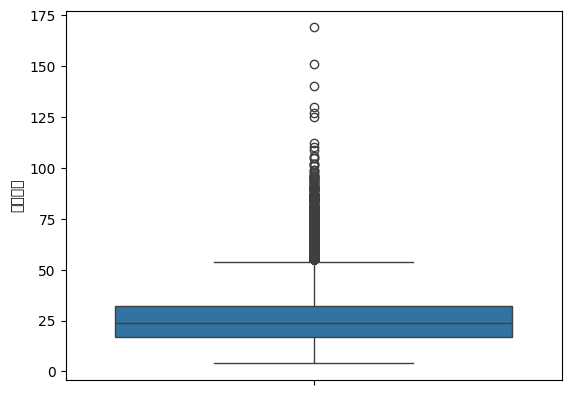

In [17]:
sns.boxplot(train_df['총계좌수'])




In [18]:

import numpy as np
mean = np.mean(train_df['총계좌수'])
std = np.std(train_df['총계좌수'])
upper_limit = mean + 3*std
lower_limit = mean - 3*std
print(upper_limit, lower_limit)

61.570335597595374 -10.960681828928585


In [19]:

cond5 = (train_df['총계좌수'] >61.5)
cond5
train_df[cond5]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
64,TRAIN_00064,30000000,60 months,10+ years,MORTGAGE,120769200,21.85,63,부채 통합,0,1280340,1728000.0,0.0,0.0,D
102,TRAIN_00102,26400000,60 months,10+ years,MORTGAGE,73560000,33.91,76,신용 카드,0,272868,400404.0,0.0,0.0,E
175,TRAIN_00175,33600000,36 months,10+ years,MORTGAGE,300000000,19.27,62,부채 통합,0,1658952,421908.0,0.0,0.0,B
200,TRAIN_00200,4200000,36 months,Unknown,RENT,39000000,25.44,81,주요 구매,0,272268,176436.0,0.0,0.0,D
309,TRAIN_00309,28800000,36 months,6 years,MORTGAGE,252000000,27.99,64,부채 통합,0,2228748,364680.0,0.0,0.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95773,TRAIN_95773,42000000,36 months,< 1 year,MORTGAGE,354000000,18.29,68,부채 통합,3,0,0.0,0.0,0.0,C
95808,TRAIN_95808,33600000,60 months,3 years,OWN,108000000,25.55,63,부채 통합,0,1261920,934944.0,0.0,0.0,B
95842,TRAIN_95842,14400000,36 months,10+ years,MORTGAGE,72000000,11.06,63,부채 통합,0,1114368,169572.0,0.0,0.0,A
95980,TRAIN_95980,9600000,36 months,3 years,RENT,80400000,12.56,72,부채 통합,0,225540,113700.0,0.0,0.0,B


In [20]:

q1 = train_df['총계좌수'].quantile(0.25)
q3 = train_df['총계좌수'].quantile(0.75)
iqr = q3 - q1 
upper_limit2 = q3 + 1.5*iqr
lower_limit2 = q1 - 1.5*iqr
print(q1,q3,iqr, upper_limit2, lower_limit2)

17.0 32.0 15.0 54.5 -5.5


In [21]:

cond6 = (train_df['총계좌수'] > upper_limit2)
train_df[cond6]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
27,TRAIN_00027,12960000,36 months,10+ years,MORTGAGE,117600000,36.75,59,신용 카드,9,623052,206016.0,0.0,0.0,B
59,TRAIN_00059,16200000,36 months,5 years,MORTGAGE,78000000,33.29,59,부채 통합,0,822864,188808.0,0.0,0.0,A
64,TRAIN_00064,30000000,60 months,10+ years,MORTGAGE,120769200,21.85,63,부채 통합,0,1280340,1728000.0,0.0,0.0,D
102,TRAIN_00102,26400000,60 months,10+ years,MORTGAGE,73560000,33.91,76,신용 카드,0,272868,400404.0,0.0,0.0,E
134,TRAIN_00134,15000000,36 months,10+ years,MORTGAGE,184800000,18.01,55,부채 통합,0,367932,90780.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96028,TRAIN_96028,9600000,36 months,10+ years,RENT,87000000,28.77,60,부채 통합,0,446028,181260.0,0.0,0.0,C
96098,TRAIN_96098,14400000,36 months,2 years,RENT,98400000,17.25,63,기타,0,349020,95364.0,0.0,0.0,B
96155,TRAIN_96155,24000000,60 months,10+ years,RENT,64800000,23.69,60,부채 통합,0,809868,884532.0,0.0,0.0,D
96207,TRAIN_96207,12000000,36 months,9 years,RENT,38400000,21.49,56,부채 통합,0,568404,181260.0,0.0,0.0,B


3905723.2686786572 -2260716.296281623
307572.0 1055076.0 747504.0 2176332.0 -813684.0


,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
133,TRAIN_00133,32550000,36 months,4 years,RENT,94080000,23.27,35,부채 통합,0,2224284,1087404.0,0.0,0.0,C
179,TRAIN_00179,22650000,60 months,1 year,MORTGAGE,48000000,4.29,22,주택 개선,0,20527032,977484.0,0.0,0.0,E
194,TRAIN_00194,42000000,36 months,4 years,RENT,138000000,29.34,31,부채 통합,0,3849096,1859304.0,0.0,0.0,C
230,TRAIN_00230,30000000,36 months,10+ years,MORTGAGE,105600000,17.97,30,부채 통합,1,2270688,492276.0,0.0,0.0,A
278,TRAIN_00278,36000000,36 months,8 years,MORTGAGE,210000000,32.03,40,신용 카드,0,2710536,666108.0,0.0,0.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96156,TRAIN_96156,36000000,36 months,10+ years,MORTGAGE,75600000,27.92,39,부채 통합,0,2625612,1155492.0,0.0,0.0,B
96174,TRAIN_96174,36000000,36 months,5 years,MORTGAGE,288000000,7.86,32,부채 통합,0,2278200,1652676.0,0.0,0.0,E
96179,TRAIN_96179,30000000,36 months,10+ years,MORTGAGE,114000000,27.84,24,신용 카드,0,2258784,518796.0,0.0,0.0,A
96249,TRAIN_96249,42000000,36 months,8 years,RENT,180000000,10.44,17,신용 카드,0,4071996,1499628.0,0.0,0.0,B


C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python3

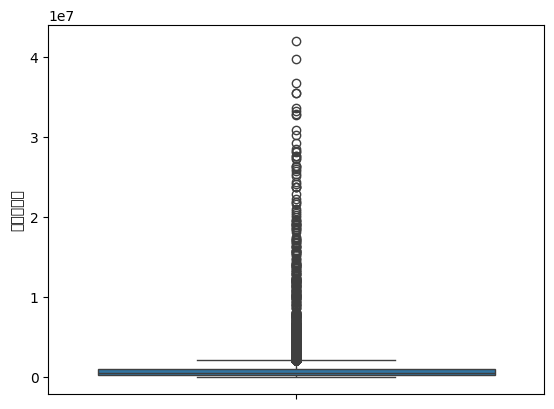

In [22]:
sns.boxplot(train_df['총상환원금'])
import numpy as np
mean = np.mean(train_df['총상환원금'])
std = np.std(train_df['총상환원금'])
upper_limit = mean + 3*std
lower_limit = mean - 3*std
print(upper_limit, lower_limit)
cond7 = (train_df['총상환원금'] >3905723)
cond7
train_df[cond7]
q1 = train_df['총상환원금'].quantile(0.25)
q3 = train_df['총상환원금'].quantile(0.75)
iqr = q3 - q1 
upper_limit2 = q3 + 1.5*iqr
lower_limit2 = q1 - 1.5*iqr
print(q1,q3,iqr, upper_limit2, lower_limit2)
cond8 = (train_df['총상환원금'] > upper_limit2)
train_df[cond8]

1748854.6178091979 -892398.1225758499
134616.0 570216.0 435600.0 1223616.0 -518784.0


,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
10,TRAIN_00010,19980000,60 months,1 year,RENT,60000000,18.87,10,부채 통합,0,722244,1523172.0,0.0,0.0,F
16,TRAIN_00016,42000000,60 months,10+ years,MORTGAGE,134400000,16.25,24,부채 통합,0,1792452,2377524.0,0.0,0.0,D
24,TRAIN_00024,20670000,60 months,7 years,RENT,61200000,20.33,36,기타,0,527244,1292412.0,0.0,0.0,G
28,TRAIN_00028,35850000,60 months,10+ years,RENT,71739600,34.88,20,신용 카드,0,1127028,1582344.0,0.0,0.0,E
62,TRAIN_00062,42000000,60 months,10+ years,MORTGAGE,174000000,18.89,18,신용 카드,0,2072736,1660344.0,0.0,0.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96260,TRAIN_96260,36000000,60 months,10+ years,MORTGAGE,110400000,34.05,37,신용 카드,1,1050240,1828968.0,0.0,0.0,E
96261,TRAIN_96261,42000000,60 months,6 years,RENT,174000000,22.03,28,부채 통합,0,851268,1582812.0,0.0,0.0,E
96262,TRAIN_96262,21120000,60 months,9 years,MORTGAGE,56400000,33.99,21,부채 통합,1,869940,1307868.0,0.0,0.0,E
96278,TRAIN_96278,19290000,36 months,10+years,MORTGAGE,72000000,11.48,25,부채 통합,0,2132196,1302840.0,0.0,0.0,D


C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\sit

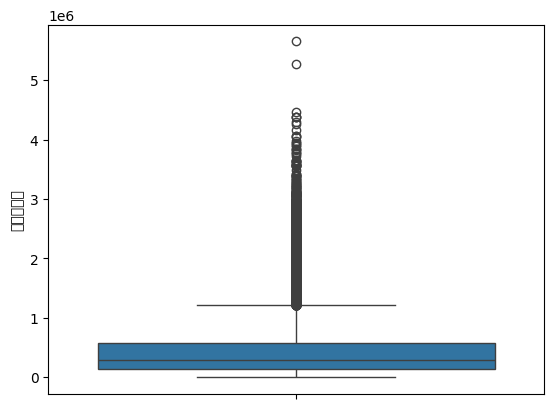

In [23]:
sns.boxplot(train_df['총상환이자'])
import numpy as np
mean = np.mean(train_df['총상환이자'])
std = np.std(train_df['총상환이자'])
upper_limit = mean + 3*std
lower_limit = mean - 3*std
print(upper_limit, lower_limit)
cond9 = (train_df['총상환이자'] >1748854.6)
cond9
train_df[cond9]
q1 = train_df['총상환이자'].quantile(0.25)
q3 = train_df['총상환이자'].quantile(0.75)
iqr = q3 - q1 
upper_limit2 = q3 + 1.5*iqr
lower_limit2 = q1 - 1.5*iqr
print(q1,q3,iqr, upper_limit2, lower_limit2)
cond10 = (train_df['총상환이자'] > upper_limit2)
train_df[cond10]

4298.666200551405 -4189.905031631223
0.0 0.0 0.0 0.0 0.0


,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
122,TRAIN_00122,11460000,36 months,10+ years,RENT,38400000,32.56,35,부채 통합,0,461676,398172.0,21792.0,0.0,E
671,TRAIN_00671,13440000,60 months,9 years,OWN,127200000,22.59,28,신용 카드,1,713760,1001016.0,18000.0,0.0,E
946,TRAIN_00946,15240000,36 months,2 years,RENT,74400000,16.45,48,신용 카드,0,1159212,260448.0,46536.0,0.0,A
1914,TRAIN_01914,17580000,60 months,10+ years,MORTGAGE,90000000,27.18,29,부채 통합,2,632292,1366848.0,25284.0,0.0,F
1975,TRAIN_01975,28800000,60 months,10+ years,MORTGAGE,276000000,17.24,33,부채 통합,0,660552,714312.0,33996.0,0.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93704,TRAIN_93704,19200000,36 months,4 years,RENT,64800000,10.73,26,신용 카드,0,1880496,558060.0,30600.0,0.0,B
93752,TRAIN_93752,20400000,36 months,9 years,MORTGAGE,150000000,12.18,18,부채 통합,3,2024784,479856.0,32052.0,0.0,B
93775,TRAIN_93775,5760000,36 months,4 years,RENT,42158400,26.97,19,부채 통합,0,403488,174936.0,18000.0,0.0,C
94549,TRAIN_94549,30000000,60 months,10+ years,MORTGAGE,102000000,7.03,14,소규모 사업,1,1262292,1740480.0,38292.0,0.0,E


C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\s

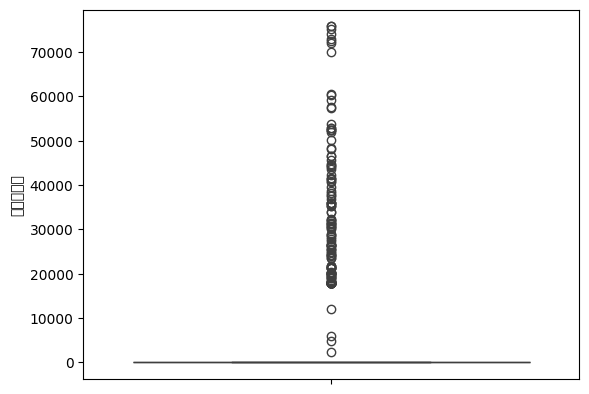

In [24]:
sns.boxplot(train_df['총연체금액'])
import numpy as np
mean = np.mean(train_df['총연체금액'])
std = np.std(train_df['총연체금액'])
upper_limit = mean + 3*std
lower_limit = mean - 3*std
print(upper_limit, lower_limit)
cond11 = (train_df['총연체금액'] >4298.6)
cond11
train_df[cond11]
q1 = train_df['총연체금액'].quantile(0.25)
q3 = train_df['총연체금액'].quantile(0.75)
iqr = q3 - q1 
upper_limit2 = q3 + 1.5*iqr
lower_limit2 = q1 - 1.5*iqr
print(q1,q3,iqr, upper_limit2, lower_limit2)
cond12 = (train_df['총연체금액'] > upper_limit2)
train_df[cond12]

0.24570256487545497 -0.23409228801500678
0.0 0.0 0.0 0.0 0.0


,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
11,TRAIN_00011,14400000,60 months,3 years,RENT,66000000,18.50,24,부채 통합,1,170820,131796.0,0.0,1.0,C
146,TRAIN_00146,4800000,36 months,2 years,RENT,64800000,30.67,43,부채 통합,6,103164,58896.0,0.0,1.0,D
372,TRAIN_00372,12000000,36 months,8 years,RENT,90000000,23.98,12,부채 통합,1,564216,219456.0,0.0,1.0,B
529,TRAIN_00529,42000000,36 months,3 years,RENT,111600000,21.41,28,신용 카드,1,3985152,1503408.0,0.0,1.0,B
899,TRAIN_00899,33600000,36 months,10+ years,OWN,216000000,9.55,65,주택 개선,2,2968812,1715652.0,0.0,1.0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95547,TRAIN_95547,24000000,36 months,10+ years,MORTGAGE,90000000,15.44,25,부채 통합,5,2120592,1280628.0,0.0,1.0,D
95703,TRAIN_95703,9600000,36 months,2 years,RENT,114000000,22.11,22,부채 통합,1,901236,372996.0,0.0,1.0,C
95775,TRAIN_95775,14400000,60 months,10+ years,RENT,120000000,24.31,53,부채 통합,4,516060,463524.0,0.0,1.0,C
95877,TRAIN_95877,6000000,36 months,10+ years,MORTGAGE,150600000,16.72,19,기타,4,135756,63792.0,0.0,1.0,C


C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51340 (\N{HANGUL SYLLABLE JWA}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
C:\Users\w7e7r\AppData\Roaming\Python\Python38\site

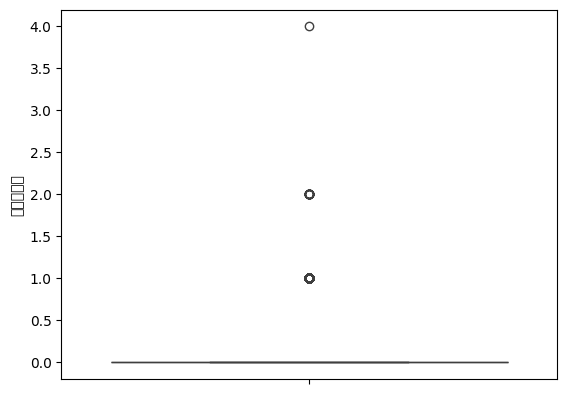

In [25]:
sns.boxplot(train_df['연체계좌수'])
import numpy as np
mean = np.mean(train_df['연체계좌수'])
std = np.std(train_df['연체계좌수'])
upper_limit = mean + 3*std
lower_limit = mean - 3*std
print(upper_limit, lower_limit)
cond13 = (train_df['연체계좌수'] >0.245)
cond13
train_df[cond13]
q1 = train_df['연체계좌수'].quantile(0.25)
q3 = train_df['연체계좌수'].quantile(0.75)
iqr = q3 - q1 
upper_limit2 = q3 + 1.5*iqr
lower_limit2 = q1 - 1.5*iqr
print(q1,q3,iqr, upper_limit2, lower_limit2)
cond14 = (train_df['연체계좌수'] > upper_limit2)
train_df[cond14]